# Tutorial 4: Extract WCD
### `themachinethatgoesping` tutorial series

`themachinethatgoesping` concepts covered:
- Get WCD
- WCD data subselection

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as theping
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

# data folder
folder = '../unittest_data'

# list raw data files
files = theping.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
cache_files = theping.echosounders.index_functions.get_index_paths(files)
fileHandler = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files,cache_files,init=True)

# get the list of all pings that contain WCD
pings = theping.pingprocessing.filter_pings.by_features(fileHandler.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = theping.pingprocessing.widgets.WCIViewer(pings)

Found 18 files
indexing files ⢀ 98% :00s<00m:00s] [Found: 729 datagrams in 18 files (10MB)]                                         
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


### Get WCD

num beams: 128, num samples: 880


Text(0.5, 1.0, 'first ping full WCD, flat view')

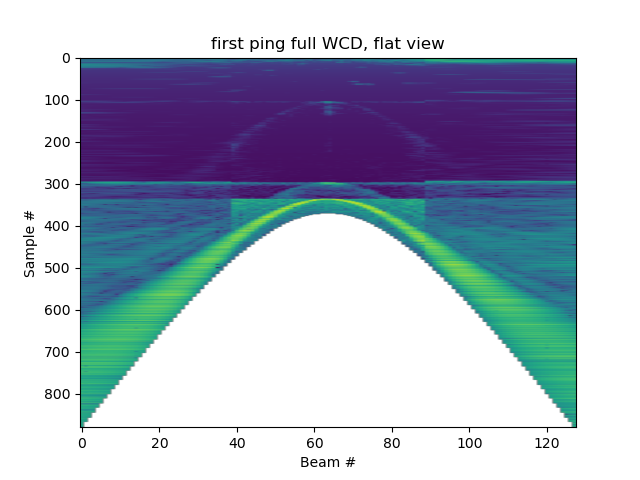

In [2]:
# Get the WCD from the first ping
image = pings[0].watercolumn.get_av()
# output is a beam x samples numpy array
print(f"num beams: {np.shape(image)[0]}, num samples: {np.shape(image)[1]}")

# display
fig1,ax1 = theping.pingprocessing.core.create_figure('wci') # we transpose the image for display purposes
ax1.imshow(image.transpose(),aspect='auto')
ax1.set_xlabel('Beam #')
ax1.set_ylabel('Sample #')
ax1.set_title('first ping full WCD, flat view')

### WCD data subselection

Text(0.5, 1.0, 'first ping WCD, flat view, selected beams')

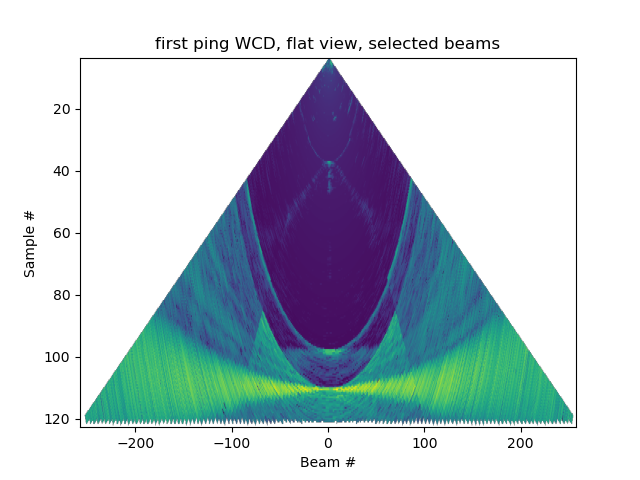

In [3]:
# We can specify the data we want, using a pingsampleselector 
pss = theping.echosounders.pingtools.PingSampleSelector()
#pss.select_beam_range_by_angles(-45,0,5) # min angle, max angle, stepsize in degrees. Other selection options are available

# apply the ping selector for beam x sample data
bs = pss.apply_selection(pings[0].watercolumn)
image = pings[0].watercolumn.get_av(bs)

image,extent = theping.pingprocessing.watercolumn.image.make_wci(pings[0],1042)


# display
fig2,ax2 = theping.pingprocessing.core.create_figure('wci') # we transpose the image for display purposes
ax2.imshow(image.transpose(),extent=extent, aspect='auto')
ax2.set_xlabel('Beam #')
ax2.set_ylabel('Sample #')
ax2.set_title('first ping WCD, flat view, selected beams')

In [4]:
theping.pingprocessing.watercolumn.image.make_wci(pings[0],1024)

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(1024, 238), dtype=float32),
 (np.float64(-257.5034494210968),
  np.float64(257.50346498506156),
  np.float64(122.79221913354488),
  np.float64(3.422639331649833)))